<a href="https://colab.research.google.com/github/olcaykursun/ML/blob/main/Fall2025/Week6/linearreg_neuralnet_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20, Loss: 333.6125
Epoch 2/20, Loss: 34.3148
Epoch 3/20, Loss: 4.6264
Epoch 4/20, Loss: 1.6783
Epoch 5/20, Loss: 1.3823
Epoch 6/20, Loss: 1.3493
Epoch 7/20, Loss: 1.3425
Epoch 8/20, Loss: 1.3384
Epoch 9/20, Loss: 1.3345
Epoch 10/20, Loss: 1.3306
Epoch 11/20, Loss: 1.3269
Epoch 12/20, Loss: 1.3231
Epoch 13/20, Loss: 1.3194
Epoch 14/20, Loss: 1.3158
Epoch 15/20, Loss: 1.3121
Epoch 16/20, Loss: 1.3085
Epoch 17/20, Loss: 1.3050
Epoch 18/20, Loss: 1.3014
Epoch 19/20, Loss: 1.2980
Epoch 20/20, Loss: 1.2945

True parameters:   m = 2.0 , b = 1.0
Learned parameters: m = 2.164381980895996 , b = -0.25015756487846375


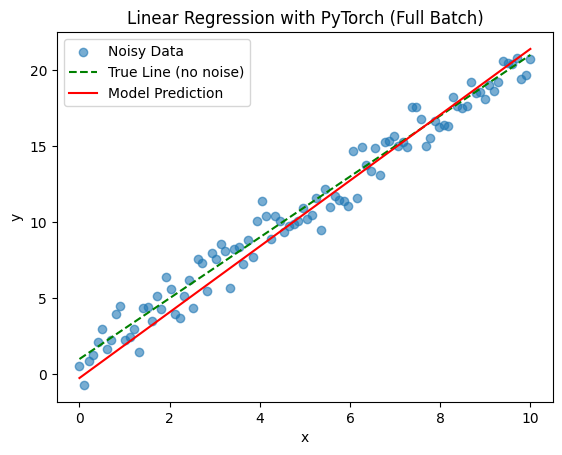

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# 1. Generate synthetic dataset
# -------------------------
np.random.seed(420)          # fix randomness for reproducibility
n_samples = 100              # number of data points
true_m = 2.0                 # true slope
true_b = 1.0                 # true intercept
noise_std = 1.0              # standard deviation of noise

# Input values evenly spaced from 0 to 10
x = np.linspace(0, 10, n_samples)

# Add Gaussian noise to the linear relation
noise = np.random.randn(n_samples) * noise_std
y = true_m * x + true_b + noise   # target values

# -------------------------
# 2. Convert data to PyTorch tensors
# -------------------------
import torch
import torch.nn as nn
import torch.optim as optim

X_train = torch.tensor(x, dtype=torch.float32).unsqueeze(1)  # shape: (N, 1)
y_train = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # shape: (N, 1)

# -------------------------
# 3. Build a simple linear regression model
# -------------------------
model = nn.Sequential(
    nn.Linear(1, 1)   # input_dim=1, output_dim=1
)

# Mean Squared Error loss
criterion = nn.MSELoss()

# SGD optimizer (learning rate is small for stability)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# -------------------------
# 4. Train the model (full batch)
# -------------------------
num_epochs = 20
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

# -------------------------
# 5. Extract learned parameters
# -------------------------
torch_params = list(model.parameters())
torch_m = torch_params[0].item()   # weight
torch_b = torch_params[1].item()   # bias

print("\nTrue parameters:   m =", true_m, ", b =", true_b)
print("Learned parameters: m =", torch_m, ", b =", torch_b)

# -------------------------
# 6. Plot results
# -------------------------
# Predictions on all x values
with torch.no_grad():
    y_pred = model(X_train).numpy()

plt.scatter(x, y, label="Noisy Data", alpha=0.6)
plt.plot(x, true_m * x + true_b, "g--", label="True Line (no noise)")
plt.plot(x, y_pred, "r", label="Model Prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression with PyTorch (Full Batch)")
plt.legend()
plt.show()
